<a href="https://colab.research.google.com/github/alberzenon/AprendisajeAutomatico/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sympy import *

Utilizando la herramienta Jupyter Notebook y el lenguaje de programación Python, realiza la siguiente actividad:

Considera la función:
$$f(x,y) = 3x^2 + 2xy + 15x + 6y^2 - y$$ 

 
 comenzando desde el punto inicial (x, y) = (-2, 3), encuentra el mínimo valor estimado para el cual esta función converge. 

In [ ]:
#declaramos la expresion de la funcion f(x,y)
x, y = symbols("x y")
funcion = 3*x**2 + 2*x*y + 15*x +6*y**2 - y
funcion

3*x**2 + 2*x*y + 15*x + 6*y**2 - y

In [ ]:
#transformamos la expresión en una función de sympy
f = lambdify('x,y',funcion)

In [ ]:
#generamos un conjunto de datos a partir de la funcion
l = 2
n = 100
linspace = np.linspace(-l,l,n) 

#
X,Y = np.meshgrid(linspace,linspace)

#
Z = f(X,Y)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


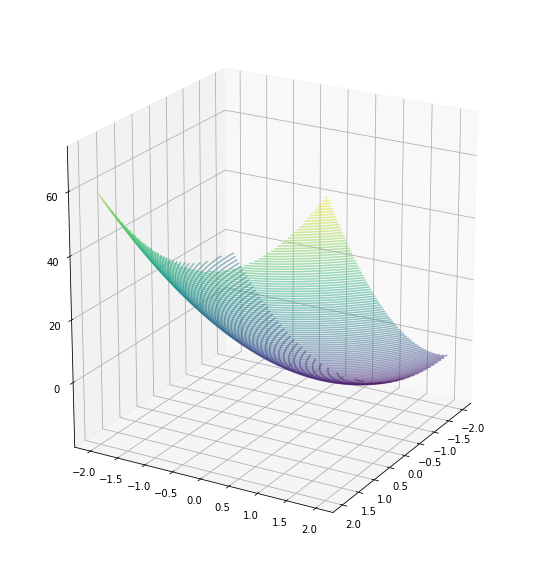

In [ ]:
#
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
ax.view_init(20, 30);

In [ ]:
f1x = funcion.diff(x)
f1xLam = lambdify('x,y',f1x)
f1y = funcion.diff(y)
f1yLam = lambdify('x,y',f1y)
f1 = [f1x,f1y]
gradiente = lambdify('x,y',f1)

In [ ]:
def gradientDescent(gradiente, punto_inicio, tamaño_paso = .085, precision = .01, max_iter = 3000, initError = 10):
    # configuracion inicial
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    # inicio de las iteraciones
    
    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 # se incrementa el contador
        prevX = currX.copy() # registra el ultimo valor de error
        
        # Gradient descent equation
        currX -= tamaño_paso * np.array(gradiente(x,y)) # New X = (last) minus (step size * function gradient(last)).
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        # Gradient descent equation
        
        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.
        
    return currIter, currX, np.vstack(iterCoords)

In [ ]:
punto_inicio = np.vstack([-2,-3])

In [ ]:
pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,punto_inicio)
print(pasos_totales)
print(coordenada_final)
coordenadas_intermedias[:5]

9
[[-2.67007459]
 [ 0.52747521]]


array([[-2.        , -3.        ],
       [-1.745     ,  0.485     ],
       [-2.2125    ,  0.37195   ],
       [-2.4223565 ,  0.453686  ],
       [-2.53908131,  0.48772689]])